# Online Sandbox Tutorial

Welcome! If you've come here to explore the capabilities of the `chainladder-python` package, you've landed in the perfect spot. This online sandbox tutorial is designed to provide you with a glimpse of the package's functionalities.

We recommend setting aside about **one hour** to complete it.

Got Stuck? Click [here](https://nbviewer.org/github/casact/chainladder-python/blob/master/docs/getting_started/online_sandbox/sandbox_workbook_filled.ipynb) for the filled in workbook. Have questions? Join the [discussion](https://github.com/casact/chainladder-python/discussions) on GitHub.

# Setting Up
We will first need to install the package, as Google Colab's default environment doesn't have the chainladder package pre-installed.

Simply execute `pip install chainladder`, Colab is smart enough to know that this is not a piece of python code, but to execute it in shell. FYI, `pip` stands for "Package Installer for Python". You will need to run this step using your terminal instead of using a python notebook when you are ready to install the package on your machine.

In [78]:
# ! pip install chainladder
# ! pip install __fill_in_code__

Other commonly used packages, such as `pandas` and `matplotlib` are already pre-installed, we just need to load them into our environment.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import chainladder as cl

print("chainladder", cl.__version__)

chainladder 0.8.26


# Your Journey Begins

Let's begin by looking at a sample dataset, called `xyz`, which is hosted on https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/xyz.csv.

Let's load the dataset into the memory with `pandas`, then inspect its "`head`".

In [80]:
xyz_df = pd.read_csv(
    "https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/xyz.csv"
)
xyz_df.head()

,AccidentYear,DevelopmentYear,Incurred,Paid,Reported,Closed,Premium
0,2002,2002,12811,2318,1342,203,61183
1,2003,2003,9651,1743,1373,181,69175
2,2004,2004,16995,2221,1932,235,99322
3,2005,2005,28674,3043,2067,295,138151
4,2006,2006,27066,3531,1473,307,107578


Can you list all of the unique accident years?

In [81]:
xyz_df["AccidentYear"].unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 1998, 1999, 2000, 2001])

How many are there?

In [82]:
xyz_df["AccidentYear"].nunique()

11

# Triangle Basics

Let's load the data into the chainladder triangle format. And let's call it `xyz_tri`.

In [83]:
xyz_tri = cl.Triangle(
    data=xyz_df,
    origin="AccidentYear",
    development="DevelopmentYear",
    columns=["Incurred", "Paid", "Reported", "Closed", "Premium"],
    cumulative=True,
)
xyz_tri

,Triangle Summary
Valuation:,2008-12
Grain:,OYDY
Shape:,"(1, 5, 11, 11)"
Index:,[Total]
Columns:,"[Incurred, Paid, Reported, Closed, Premium]"


What does the incurred triangle look like?

In [84]:
xyz_tri["Incurred"]

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"11,171","12,380","13,216","14,067","14,688","16,366","16,163","15,835","15,822"
1999,,"13,255","16,405","19,639","22,473","23,764","25,094","24,795","25,071","25,107",
2000,"15,676","18,749","21,900","27,144","29,488","34,458","36,949","37,505","37,246",,
2001,"11,827","16,004","21,022","26,578","34,205","37,136","38,541","38,798",,,
2002,"12,811","20,370","26,656","37,667","44,414","48,701","48,169",,,,
2003,"9,651","16,995","30,354","40,594","44,231","44,373",,,,,
2004,"16,995","40,180","58,866","71,707","70,288",,,,,,
2005,"28,674","47,432","70,340","70,655",,,,,,,
2006,"27,066","46,783","48,804",,,,,,,,
2007,"19,477","31,732",,,,,,,,,


How about paid?

In [85]:
xyz_tri["Paid"]

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"6,309","8,521","10,082","11,620","13,242","14,419","15,311","15,764","15,822"
1999,,"4,666","9,861","13,971","18,127","22,032","23,511","24,146","24,592","24,817",
2000,"1,302","6,513","12,139","17,828","24,030","28,853","33,222","35,902","36,782",,
2001,"1,539","5,952","12,319","18,609","24,387","31,090","37,070","38,519",,,
2002,"2,318","7,932","13,822","22,095","31,945","40,629","44,437",,,,
2003,"1,743","6,240","12,683","22,892","34,505","39,320",,,,,
2004,"2,221","9,898","25,950","43,439","52,811",,,,,,
2005,"3,043","12,219","27,073","40,026",,,,,,,
2006,"3,531","11,778","22,819",,,,,,,,
2007,"3,529","11,865",,,,,,,,,


# Pandas-like Operations

Let's see how `.iloc[...]` and `.loc[...]` similarly to pandas. They take 4 parameters: [index, column, origin, valuation].

What if we want the row from AY 1998 Incurred data?

In [86]:
xyz_tri.iloc[:, 0, 0, :]

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"11,171","12,380","13,216","14,067","14,688","16,366","16,163","15,835","15,822"


What if you only want the valuation at age 60 of AY 1998?

In [87]:
xyz_tri.iloc[:, 0, 0, 4]

,60
1998,"13,216"


Let's use `.loc[...]` to get the incurred triangle.

In [88]:
xyz_tri.loc[:, "Incurred", :, :]

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"11,171","12,380","13,216","14,067","14,688","16,366","16,163","15,835","15,822"
1999,,"13,255","16,405","19,639","22,473","23,764","25,094","24,795","25,071","25,107",
2000,"15,676","18,749","21,900","27,144","29,488","34,458","36,949","37,505","37,246",,
2001,"11,827","16,004","21,022","26,578","34,205","37,136","38,541","38,798",,,
2002,"12,811","20,370","26,656","37,667","44,414","48,701","48,169",,,,
2003,"9,651","16,995","30,354","40,594","44,231","44,373",,,,,
2004,"16,995","40,180","58,866","71,707","70,288",,,,,,
2005,"28,674","47,432","70,340","70,655",,,,,,,
2006,"27,066","46,783","48,804",,,,,,,,
2007,"19,477","31,732",,,,,,,,,


How do we get the latest Incurred diagonal only?

In [89]:
xyz_tri["Incurred"].latest_diagonal

,2008
1998,"15,822"
1999,"25,107"
2000,"37,246"
2001,"38,798"
2002,"48,169"
2003,"44,373"
2004,"70,288"
2005,"70,655"
2006,"48,804"
2007,"31,732"


Very often, we want incremental triangles instead. Let's convert the Incurred triangle to the incremental form.

In [90]:
xyz_tri["Incurred"].cum_to_incr()

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"11,171","1,209",836,851,621,"1,678",-203,-328,-13
1999,,"13,255","3,150","3,234","2,834","1,291","1,330",-299,276,36,
2000,"15,676","3,073","3,151","5,244","2,344","4,970","2,491",556,-259,,
2001,"11,827","4,177","5,018","5,556","7,627","2,931","1,405",257,,,
2002,"12,811","7,559","6,286","11,011","6,747","4,287",-532,,,,
2003,"9,651","7,344","13,359","10,240","3,637",142,,,,,
2004,"16,995","23,185","18,686","12,841","-1,419",,,,,,
2005,"28,674","18,758","22,908",315,,,,,,,
2006,"27,066","19,717","2,021",,,,,,,,
2007,"19,477","12,255",,,,,,,,,


We can also convert the triangle to the valuation format, what we often see on Schedule Ps.

In [91]:
xyz_tri["Incurred"].dev_to_val()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
1998,,,"11,171","12,380","13,216","14,067","14,688","16,366","16,163","15,835","15,822"
1999,,,"13,255","16,405","19,639","22,473","23,764","25,094","24,795","25,071","25,107"
2000,,,"15,676","18,749","21,900","27,144","29,488","34,458","36,949","37,505","37,246"
2001,,,,"11,827","16,004","21,022","26,578","34,205","37,136","38,541","38,798"
2002,,,,,"12,811","20,370","26,656","37,667","44,414","48,701","48,169"
2003,,,,,,"9,651","16,995","30,354","40,594","44,231","44,373"
2004,,,,,,,"16,995","40,180","58,866","71,707","70,288"
2005,,,,,,,,"28,674","47,432","70,340","70,655"
2006,,,,,,,,,"27,066","46,783","48,804"
2007,,,,,,,,,,"19,477","31,732"


Another function that is often useful is the `.heatmap()` method. Let's inspect the incurred amount and see if there are trends.

In [92]:
xyz_tri["Incurred"].heatmap()

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"11,171","12,380","13,216","14,067","14,688","16,366","16,163","15,835","15,822"
1999,,"13,255","16,405","19,639","22,473","23,764","25,094","24,795","25,071","25,107",
2000,"15,676","18,749","21,900","27,144","29,488","34,458","36,949","37,505","37,246",,
2001,"11,827","16,004","21,022","26,578","34,205","37,136","38,541","38,798",,,
2002,"12,811","20,370","26,656","37,667","44,414","48,701","48,169",,,,
2003,"9,651","16,995","30,354","40,594","44,231","44,373",,,,,
2004,"16,995","40,180","58,866","71,707","70,288",,,,,,
2005,"28,674","47,432","70,340","70,655",,,,,,,
2006,"27,066","46,783","48,804",,,,,,,,
2007,"19,477","31,732",,,,,,,,,


# Development

How can we get the incurred link ratios?

In [93]:
xyz_tri["Incurred"].link_ratio

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132
1998,,,1.1082,1.0675,1.0644,1.0441,1.1142,0.9876,0.9797,0.9992
1999,,1.2376,1.1971,1.1443,1.0574,1.0560,0.9881,1.0111,1.0014,
2000,1.1960,1.1681,1.2395,1.0864,1.1685,1.0723,1.0150,0.9931,,
2001,1.3532,1.3135,1.2643,1.2870,1.0857,1.0378,1.0067,,,
2002,1.5900,1.3086,1.4131,1.1791,1.0965,0.9891,,,,
2003,1.7610,1.7861,1.3374,1.0896,1.0032,,,,,
2004,2.3642,1.4651,1.2181,0.9802,,,,,,
2005,1.6542,1.4830,1.0045,,,,,,,
2006,1.7285,1.0432,,,,,,,,
2007,1.6292,,,,,,,,,


We can also apply a `.heatmap()` to make it too, to help us visulize the highs and lows.

In [94]:
xyz_tri["Incurred"].link_ratio.heatmap()

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132
1998,,,1.1082,1.0675,1.0644,1.0441,1.1142,0.9876,0.9797,0.9992
1999,,1.2376,1.1971,1.1443,1.0574,1.0560,0.9881,1.0111,1.0014,
2000,1.1960,1.1681,1.2395,1.0864,1.1685,1.0723,1.0150,0.9931,,
2001,1.3532,1.3135,1.2643,1.2870,1.0857,1.0378,1.0067,,,
2002,1.5900,1.3086,1.4131,1.1791,1.0965,0.9891,,,,
2003,1.7610,1.7861,1.3374,1.0896,1.0032,,,,,
2004,2.3642,1.4651,1.2181,0.9802,,,,,,
2005,1.6542,1.4830,1.0045,,,,,,,
2006,1.7285,1.0432,,,,,,,,
2007,1.6292,,,,,,,,,


Let's get a volume-weighted average LDFs for our Incurred triangle.

In [95]:
cl.Development(average="volume").fit(xyz_tri["Incurred"]).ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120,120-132
(All),1.6757,1.3394,1.1934,1.0959,1.0770,1.0336,1.0190,0.9976,0.9929,0.9992


L'erreur `NameError: name '__fill_in_code__' is not defined` signifie que le placeholder `__fill_in_code__` n'a pas été remplacé par une valeur ou une variable réelle. Dans ce contexte, la méthode `fit` de `cl.Development()` attend un triangle comme argument. La solution consiste à remplacer ce placeholder par `xyz_tri["Incurred"]`, qui représente le triangle d'incurred que nous souhaitons analyser.

How about the CDFs? But use a `simple` average instead.

In [96]:
cl.Development(average="simple").fit(xyz_tri["Incurred"]).cdf_

,12-Ult,24-Ult,36-Ult,48-Ult,60-Ult,72-Ult,84-Ult,96-Ult,108-Ult,120-Ult
(All),3.5034,2.1111,1.5630,1.2782,1.1422,1.0582,1.0177,0.9871,0.9898,0.9992


We can also use only the latest 3 periods in the calculation of CDFs.

In [97]:
cl.Development(average="simple", n_periods=3).fit(xyz_tri["Incurred"]).cdf_

,12-Ult,24-Ult,36-Ult,48-Ult,60-Ult,72-Ult,84-Ult,96-Ult,108-Ult,120-Ult
(All),3.1027,1.8572,1.3960,1.1764,1.0863,1.0230,0.9903,0.9871,0.9898,0.9992


# Deterministic Models

Before we can build any models, we need to use `fit_transform()`, so that the object is actually modified with our selected development pattern(s).

Set the development of the triangle to use only 3 periods, calculated using the `simple` method.

In [99]:
cl.Development(average="volume", n_periods=3).fit_transform(xyz_tri["Incurred"])

,12,24,36,48,60,72,84,96,108,120,132
1998,,,"11,171","12,380","13,216","14,067","14,688","16,366","16,163","15,835","15,822"
1999,,"13,255","16,405","19,639","22,473","23,764","25,094","24,795","25,071","25,107",
2000,"15,676","18,749","21,900","27,144","29,488","34,458","36,949","37,505","37,246",,
2001,"11,827","16,004","21,022","26,578","34,205","37,136","38,541","38,798",,,
2002,"12,811","20,370","26,656","37,667","44,414","48,701","48,169",,,,
2003,"9,651","16,995","30,354","40,594","44,231","44,373",,,,,
2004,"16,995","40,180","58,866","71,707","70,288",,,,,,
2005,"28,674","47,432","70,340","70,655",,,,,,,
2006,"27,066","46,783","48,804",,,,,,,,
2007,"19,477","31,732",,,,,,,,,


Let's fit a chainladder model to our Incurred triangle.

In [101]:
cl_mod = cl.Chainladder().fit(xyz_tri["Incurred"])
cl_mod

Chainladder()

How can we get the model's ultimate estimate?

In [103]:
cl_mod.ultimate_

,2261
1998,"15,822"
1999,"25,086"
2000,"36,952"
2001,"38,401"
2002,"48,582"
2003,"46,258"
2004,"78,914"
2005,"86,933"
2006,"71,662"
2007,"62,406"


How about just the IBNR?

In [105]:
cl_mod.ibnr_

,2261
1998,
1999,-21
2000,-294
2001,-397
2002,413
2003,"1,885"
2004,"8,626"
2005,"16,278"
2006,"22,858"
2007,"30,674"


Let's fit an Expected Loss model, with an aprior of 90% on Premium, and get its ultimates.

In [107]:
cl.ExpectedLoss(apriori=0.90).fit(
    xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal
).ultimate_

,2261
1998,"18,000"
1999,"28,350"
2000,"40,500"
2001,"45,000"
2002,"55,065"
2003,"62,258"
2004,"89,390"
2005,"124,336"
2006,"96,820"
2007,"56,194"


Try it on the Paid triangle, do you get the same ultimate?

In [110]:
cl.ExpectedLoss(apriori=0.90).fit(
    xyz_tri["Paid"], sample_weight=xyz_tri["Premium"].latest_diagonal
).ultimate_

,2261
1998,"18,000"
1999,"28,350"
2000,"40,500"
2001,"45,000"
2002,"55,065"
2003,"62,258"
2004,"89,390"
2005,"124,336"
2006,"96,820"
2007,"56,194"


How about a Bornhuetter-Ferguson model?

In [111]:
cl.BornhuetterFerguson(apriori=0.90).fit(
    xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal
).ultimate_

,2261
1998,"15,822"
1999,"25,084"
2000,"36,924"
2001,"38,332"
2002,"48,637"
2003,"46,910"
2004,"80,059"
2005,"93,937"
2006,"79,686"
2007,"59,353"


How about Benktander, with 1 iteration, which is the same as BF?

In [113]:
cl.Benktander(apriori=0.90, n_iters=1).fit(
    xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal
).ultimate_

,2261
1998,"15,822"
1999,"25,084"
2000,"36,924"
2001,"38,332"
2002,"48,637"
2003,"46,910"
2004,"80,059"
2005,"93,937"
2006,"79,686"
2007,"59,353"


How about Cape Cod?

In [115]:
cl.CapeCod().fit(
    xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal
).ultimate_

,2261
1998,"15,822"
1999,"25,087"
2000,"36,975"
2001,"38,407"
2002,"48,562"
2003,"46,504"
2004,"78,496"
2005,"90,214"
2006,"74,748"
2007,"54,936"


Let's store the Cape Cod model as `cc_result`. We can also use `.to_frame()` to leave `chainladder` and go to a `DataFrame`. Let's make a bar chart over origin years to see what they look like.

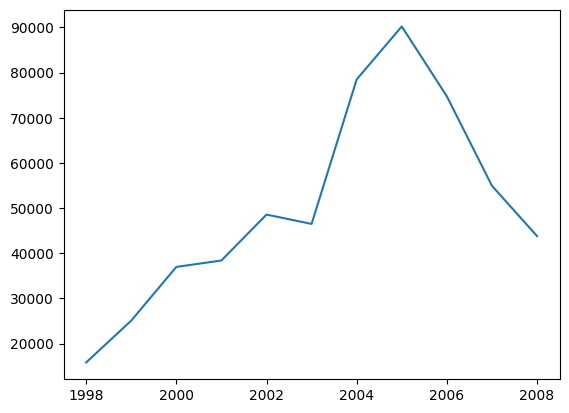

In [118]:
cc_result = (
    cl.CapeCod()
    .fit(xyz_tri["Incurred"], sample_weight=xyz_tri["Premium"].latest_diagonal)
    .ultimate_
).to_frame()

plt.plot(
    cc_result.index.year,
    cc_result["2261"]
)

# Stochastic Models

The Mack's Chainladder model is available. Let's use it on the Incurred triangle.

In [120]:
mcl_mod = cl.MackChainladder().fit(xyz_tri["Incurred"])
mcl_mod

MackChainladder()

There are many attributes that are available, such as `full_std_err_`, `total_process_risk_`, `total_parameter_risk_`, `mack_std_err_` and `total_mack_std_err_`.

In [122]:
mcl_mod.full_std_err_

,12,24,36,48,60,72,84,96,108,120,132
1998,0.0000,0.0000,0.2450,0.1741,0.0886,0.0537,0.0609,0.0146,0.0169,0.0107,0.0000
1999,0.0000,0.3254,0.2022,0.1382,0.0679,0.0413,0.0466,0.0118,0.0136,0.0085,0.0000
2000,0.3467,0.2736,0.1750,0.1176,0.0593,0.0343,0.0384,0.0096,0.0112,0.0070,0.0000
2001,0.3991,0.2961,0.1786,0.1188,0.0550,0.0330,0.0376,0.0095,0.0109,0.0069,0.0000
2002,0.3835,0.2625,0.1586,0.0998,0.0483,0.0289,0.0337,0.0084,0.0097,0.0061,0.0000
2003,0.4418,0.2874,0.1487,0.0961,0.0484,0.0302,0.0345,0.0086,0.0100,0.0063,0.0000
2004,0.3330,0.1869,0.1067,0.0723,0.0384,0.0231,0.0264,0.0066,0.0076,0.0048,0.0000
2005,0.2563,0.1720,0.0977,0.0729,0.0366,0.0221,0.0252,0.0063,0.0073,0.0046,0.0000
2006,0.2638,0.1732,0.1172,0.0803,0.0403,0.0243,0.0277,0.0069,0.0080,0.0050,0.0000
2007,0.3110,0.2103,0.1256,0.0860,0.0432,0.0260,0.0297,0.0074,0.0086,0.0054,0.0000


MackChainladder also has a `summary_` attribute.

In [124]:
mcl_mod.summary_

,Latest,IBNR,Ultimate,Mack Std Err
1998,"15,822",,"15,822",
1999,"25,107",-21,"25,086",344
2000,"37,246",-294,"36,952",744
2001,"38,798",-397,"38,401",886
2002,"48,169",413,"48,582","2,186"
2003,"44,373","1,885","46,258","2,611"
2004,"70,288","8,626","78,914","5,000"
2005,"70,655","16,278","86,933","8,484"
2006,"48,804","22,858","71,662","10,737"
2007,"31,732","30,674","62,406","14,409"


Let's make a graph, that shows the Reported and IBNR as stacked bars, and error bars showing Mack Standard Errors.

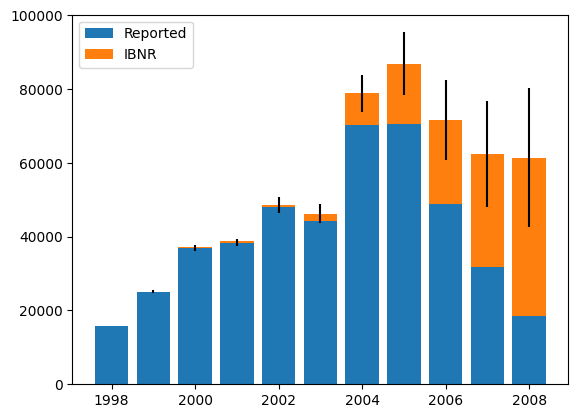

In [127]:
plt.bar(
    mcl_mod.summary_.to_frame().index.year,
    mcl_mod.summary_.to_frame()["Latest"],
    label="Reported",
)
plt.bar(
    mcl_mod.summary_.to_frame().index.year,
    mcl_mod.summary_.to_frame()["IBNR"],
    bottom=mcl_mod.summary_.to_frame()["Latest"],
    yerr=mcl_mod.summary_.to_frame()["Mack Std Err"],
    label="IBNR",
)
plt.legend(loc="upper left")

ODP Bootstrap is also available. Let's build sample 10,000 Incurred triangles.

In [130]:
xyz_tri_sampled = (
    cl.BootstrapODPSample(n_sims=10000).fit(xyz_tri["Incurred"]).resampled_triangles_
)
xyz_tri_sampled

,Triangle Summary
Valuation:,2008-12
Grain:,OYDY
Shape:,"(10000, 1, 11, 11)"
Index:,[Total]
Columns:,[Incurred]


We can fit a basic chainladder to all sampled triangles. We now have 10,000 simulated chainladder models, all (most) with unique LDFs.

In [131]:
cl_mod_bootstrapped = cl.Chainladder().fit(xyz_tri_sampled)
cl_mod_bootstrapped

/usr/local/lib/python3.12/dist-packages/chainladder/utils/weighted_regression.py:84: RuntimeWarning: invalid value encountered in sqrt
  residual = (y - fitted_value) * xp.sqrt(w)
/usr/local/lib/python3.12/dist-packages/chainladder/development/development.py:174: RuntimeWarning: invalid value encountered in sqrt
  / xp.swapaxes(xp.sqrt(x ** (2 - exponent))[..., 0:1, :], -1, -2)
/usr/local/lib/python3.12/dist-packages/chainladder/development/development.py:185: RuntimeWarning: invalid value encountered in sqrt
  std = xp.sqrt((1 / num_to_nan(w)) * (self.sigma_**2).values)
/usr/local/lib/python3.12/dist-packages/chainladder/tails/base.py:120: RuntimeWarning: overflow encountered in exp
  sigma_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.12/dist-packages/chainladder/tails/base.py:124: RuntimeWarning: overflow encountered in exp
  std_err_ = xp.exp(time_pd * reg.slope_ + reg.intercept_)
/usr/local/lib/python3.12/dist-packages/chainladder/tails/base.py:127: Runti

Chainladder()

Let's make another graph.

<BarContainer object of 11 artists>

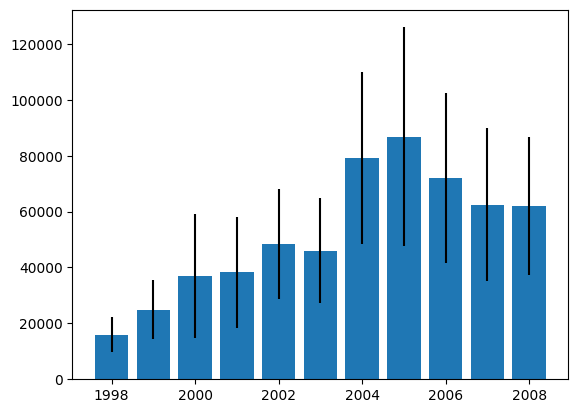

In [133]:
plt.bar(
    cl_mod_bootstrapped.ultimate_.mean().to_frame().index.year,
    cl_mod_bootstrapped.ultimate_.mean().to_frame()["2261"],
    yerr=cl_mod_bootstrapped.ultimate_.std().to_frame()["2261"],
)